In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

In [2]:
df_sent = pd.read_csv('AllTweetsAnalysed.csv')

In [3]:
def applythis(x):
    try:
        return x.lower()
    except:
        return ''

In [4]:
df_sent['date'] = pd.to_datetime(df_sent['created_at']).dt.date
df_klmsent = df_sent[df_sent['text'].apply(lambda x: applythis(x)).str.contains('@klm')]
df_sentmeans = df_klmsent.groupby('date').agg(['mean'])

In [5]:
klmtweets = df_sent[df_sent['user_id'] == 56377143]
parents = klmtweets[klmtweets['in_reply_to_status_id'].isnull()]
announcements = parents[~parents['text'].str.contains('@')]['created_at'].to_list()

In [6]:
announcements = sorted(announcements)

In [7]:
meansperday = df_sentmeans['sentiment']

In [8]:
kern = np.array([0.1,0.2,0.4,0.2,0.1])
out=np.convolve(meansperday['mean'].to_list(),kern, mode='same')
out2 = out[round(len(kern)/2):round(len(out)-len(kern)/2)]
outindex = meansperday.index[round(len(kern)/2):round(len(out)-len(kern)/2)]

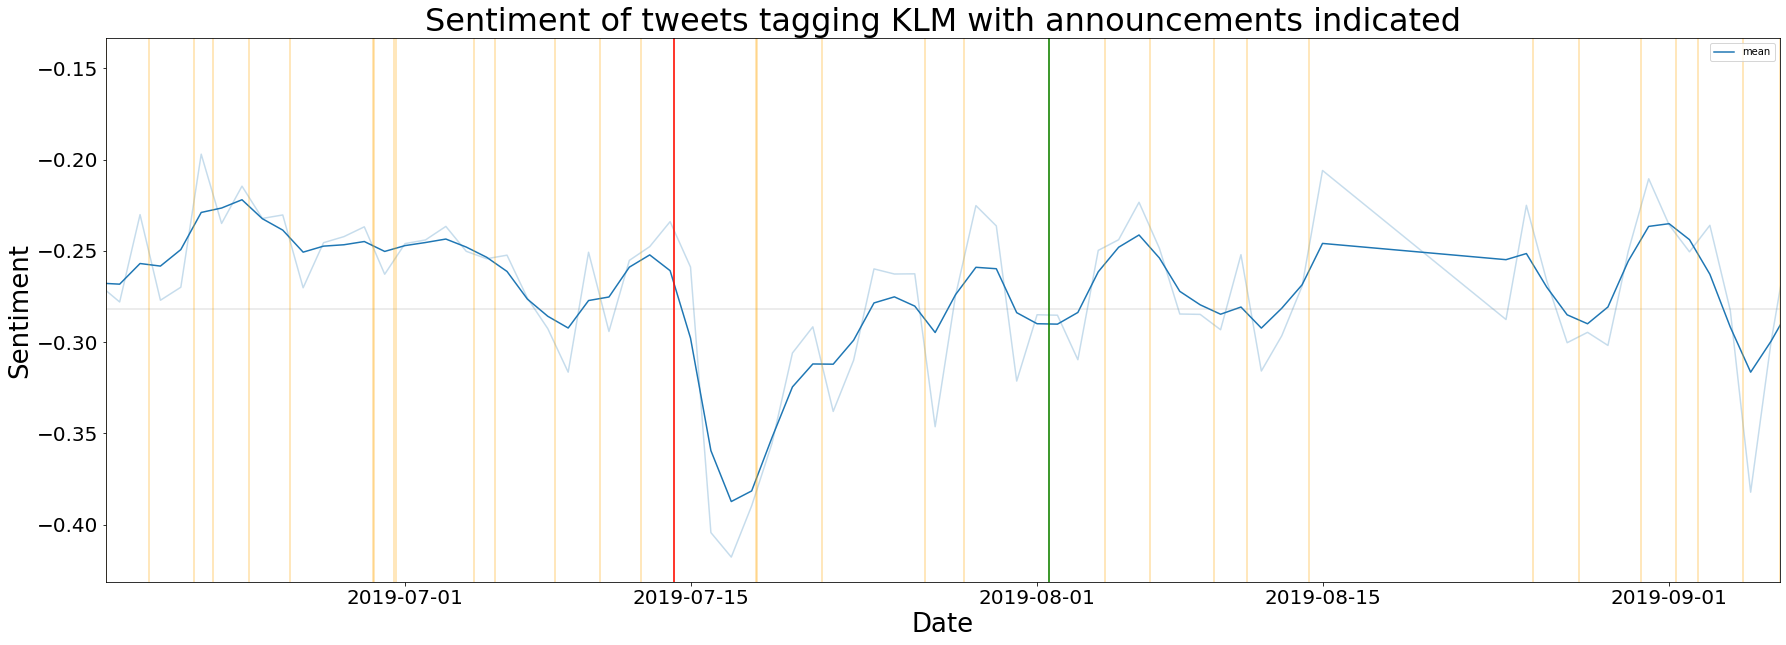

In [15]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(30,10))
sns.lineplot(x=outindex,y=out2)
sns.lineplot(data=meansperday, alpha = 0.25)
plt.axhline(df_klmsent['sentiment'].mean(),0,1,color = 'gray',alpha = 0.2)
for index, i in enumerate(announcements):
    plt.axvline(pd.to_datetime(i),1,0,color = 'orange', alpha = 0.35)
plt.axvline(pd.to_datetime(announcements[31]),1,0,color = 'green', alpha = 1)
plt.axvline(pd.to_datetime(announcements[25]),1,0,color = 'red', alpha = 1)
ax.set_xlim(pd.to_datetime(announcements[10]),pd.to_datetime(announcements[43]))
plt.xticks(fontsize=20, rotation=0)
plt.yticks(fontsize=20, rotation=0)
plt.xlabel('Date',fontsize=26)
plt.ylabel('Sentiment',fontsize=26)
plt.title('Sentiment of tweets tagging KLM with announcements indicated',fontsize=32);

In [10]:
parents[parents['created_at'] == announcements[31]]
# Tweet before disaster 25
# https://twitter.com/KLM/status/1149675804248485888?s=20
# 
# Asking for replies of customers can lead to people sharing negative experiences
#
# Tweet before good 26
# https://twitter.com/KLM/status/1137600241425952768?s=20
# 
# Note about this - simple promotion, not asking for reply
# 
# Tweet before good 31 
# https://twitter.com/KLM/status/1156928317838123009?s=20
#
# Note - Speaking out about pride days and other similair things is good

,Unnamed: 0,in_reply_to_status_id,created_at,id,text,user_id,sentiment,date
3776514,3776514,NaN,2019-08-01 14:03:00+00:00,1.156928e+18,Happy Pride! ❤️🧡💛💚💙💜 https://t.co/xwnAvrdGTI,56377143.0,0.347698,2019-08-01
